# Title

**Authors:** Pranavi Jain, Dr Marcin Abram

**Affiliation:** University of Southern California

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum", token="9037071e37ec172af7425e2456b141a1322dc872aec8e887ef32fe92c7c3b7f656fc06773f7d8bd72d4a4be432413719d0920ee13aa72ea659888e0c58298d43", 
                                  set_as_default=True, overwrite=True)
 
# Load saved credentials
service = QiskitRuntimeService()

### Generating Random Circuit for Given Parameters

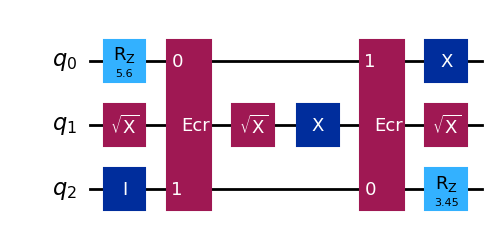

In [2]:
import numpy as np

from qiskit.circuit import ClassicalRegister, QuantumCircuit, CircuitInstruction
from qiskit.circuit import Reset
from qiskit.circuit.library import standard_gates
from qiskit.circuit.exceptions import CircuitError

# Gates for Eagle processor
eagle_gate_set_1q = [ 
    # (Gate class, number of qubits, number of parameters)       
    (standard_gates.IGate, 1, 0),
    (standard_gates.SXGate, 1, 0),
    (standard_gates.XGate, 1, 0),
    (standard_gates.RZGate, 1, 1),
]
eagle_gate_set_2q = [(standard_gates.ECRGate, 2, 0),]
eagle_gate_set = {"1q":eagle_gate_set_1q, "2q":eagle_gate_set_2q}

# Pauli gates / Basic Gates
basis_gate_set_1q = [
    (standard_gates.IGate, 1, 0),
    (standard_gates.XGate, 1, 0),
    (standard_gates.YGate, 1, 0),
    (standard_gates.ZGate, 1, 0),
]
basis_gate_set_2q = [    
    (standard_gates.CXGate, 2, 0),
    (standard_gates.SwapGate, 2, 0),
]
basis_gate_set_3q = [(standard_gates.CCXGate, 3, 0),]
basis_gate_set = {"1q":basis_gate_set_1q, "2q":eagle_gate_set_2q, "3q":basis_gate_set_3q}

# Standard gates - Qiskit Library
gates_1q = [
    (standard_gates.IGate, 1, 0),
    (standard_gates.SXGate, 1, 0),
    (standard_gates.XGate, 1, 0),
    (standard_gates.RZGate, 1, 1),
    (standard_gates.RGate, 1, 2),
    (standard_gates.HGate, 1, 0),
    (standard_gates.PhaseGate, 1, 1),
    (standard_gates.RXGate, 1, 1),
    (standard_gates.RYGate, 1, 1),
    (standard_gates.SGate, 1, 0),
    (standard_gates.SdgGate, 1, 0),
    (standard_gates.SXdgGate, 1, 0),
    (standard_gates.TGate, 1, 0),
    (standard_gates.TdgGate, 1, 0),
    (standard_gates.UGate, 1, 3),
    (standard_gates.U1Gate, 1, 1),
    (standard_gates.U2Gate, 1, 2),
    (standard_gates.U3Gate, 1, 3),
    (standard_gates.YGate, 1, 0),
    (standard_gates.ZGate, 1, 0),
]
gates_2q = [
    (standard_gates.CXGate, 2, 0),
    (standard_gates.DCXGate, 2, 0),
    (standard_gates.CHGate, 2, 0),
    (standard_gates.CPhaseGate, 2, 1),
    (standard_gates.CRXGate, 2, 1),
    (standard_gates.CRYGate, 2, 1),
    (standard_gates.CRZGate, 2, 1),
    (standard_gates.CSXGate, 2, 0),
    (standard_gates.CUGate, 2, 4),
    (standard_gates.CU1Gate, 2, 1),
    (standard_gates.CU3Gate, 2, 3),
    (standard_gates.CYGate, 2, 0),
    (standard_gates.CZGate, 2, 0),
    (standard_gates.RXXGate, 2, 1),
    (standard_gates.RYYGate, 2, 1),
    (standard_gates.RZZGate, 2, 1),
    (standard_gates.RZXGate, 2, 1),
    (standard_gates.XXMinusYYGate, 2, 2),
    (standard_gates.XXPlusYYGate, 2, 2),
    (standard_gates.ECRGate, 2, 0),
    (standard_gates.CSGate, 2, 0),
    (standard_gates.CSdgGate, 2, 0),
    (standard_gates.SwapGate, 2, 0),
    (standard_gates.iSwapGate, 2, 0),
]
gates_3q = [
    (standard_gates.CCXGate, 3, 0),
    (standard_gates.CSwapGate, 3, 0),
    (standard_gates.CCZGate, 3, 0),
    (standard_gates.RCCXGate, 3, 0),
]
gates_4q = [
    (standard_gates.C3SXGate, 4, 0),
    (standard_gates.RC3XGate, 4, 0),
]
standard_gate_set = {"1q":gates_1q, "2q":gates_2q, "3q":gates_3q, "4q":gates_4q}


# This code is part of Qiskit.
#
# (C) Copyright IBM 2017.
#
# This code is licensed under the Apache License, Version 2.0. You may
# obtain a copy of this license in the LICENSE.txt file in the root directory
# of this source tree or at http://www.apache.org/licenses/LICENSE-2.0.
#
# Any modifications or derivative works of this code must retain this
# copyright notice, and modified files need to carry a notice indicating
# that they have been altered from the originals.

"""Utility functions for generating random circuits."""

# Returning random quantum circuit given num_q, depth, and gate_set
def random_circuit(
    num_qubits, depth, gate_set, max_operands=4, measure=False, conditional=False, reset=False, seed=None
):
    """Generate random circuit of arbitrary size and form, given the allowed set of gates.

    This function will generate a random circuit by randomly selecting gates
    from the set of standard gates in :mod:`qiskit.circuit.library.standard_gates`. For example:

    .. plot::
       :include-source:

       from qiskit.circuit.random import random_circuit

       circ = random_circuit(2, 2, measure=True)
       circ.draw(output='mpl')

    Args:
        num_qubits (int): number of quantum wires
        depth (int): layers of operations (i.e. critical path length)
        max_operands (int): maximum qubit operands of each gate (between 1 and 4)
        measure (bool): if True, measure all qubits at the end
        conditional (bool): if True, insert middle measurements and conditionals
        reset (bool): if True, insert middle resets
        seed (int): sets random seed (optional)

    Returns:
        QuantumCircuit: constructed circuit

    Raises:
        CircuitError: when invalid options given
    """
    if num_qubits == 0:
        return QuantumCircuit()
    if max_operands < 1 or max_operands > 4:
        raise CircuitError("max_operands must be between 1 and 4")
    max_operands = max_operands if num_qubits > max_operands else num_qubits

    gates_1q = gate_set.get("1q")
    if reset:
        gates_1q.append((Reset, 1, 0))
    gates_2q = gate_set.get("2q")
    gates_3q = gate_set.get("3q")
    gates_4q = gate_set.get("4q")

    gates = gates_1q.copy()
    if max_operands >= 2 and gates_2q != None:
        gates.extend(gates_2q)
    if max_operands >= 3 and gates_3q != None:
        gates.extend(gates_3q)
    if max_operands >= 4 and gates_4q != None:
        gates.extend(gates_4q)
    gates = np.array(
        gates, dtype=[("class", object), ("num_qubits", np.int64), ("num_params", np.int64)]
    )
    gates_1q = np.array(gates_1q, dtype=gates.dtype)

    qc = QuantumCircuit(num_qubits)

    if measure or conditional:
        cr = ClassicalRegister(num_qubits, "c")
        qc.add_register(cr)

    if seed is None:
        seed = np.random.randint(0, np.iinfo(np.int32).max)
    rng = np.random.default_rng(seed)

    qubits = np.array(qc.qubits, dtype=object, copy=True)

    # Apply arbitrary random operations in layers across all qubits.
    for layer_number in range(depth):
        # We generate all the randomness for the layer in one go, to avoid many separate calls to
        # the randomisation routines, which can be fairly slow.

        # This reliably draws too much randomness, but it's less expensive than looping over more
        # calls to the rng. After, trim it down by finding the point when we've used all the qubits.
        gate_specs = rng.choice(gates, size=len(qubits))
        cumulative_qubits = np.cumsum(gate_specs["num_qubits"], dtype=np.int64)
        # Efficiently find the point in the list where the total gates would use as many as
        # possible of, but not more than, the number of qubits in the layer.  If there's slack, fill
        # it with 1q gates.
        max_index = np.searchsorted(cumulative_qubits, num_qubits, side="right")
        gate_specs = gate_specs[:max_index]
        slack = num_qubits - cumulative_qubits[max_index - 1]
        if slack:
            gate_specs = np.hstack((gate_specs, rng.choice(gates_1q, size=slack)))

        # For efficiency in the Python loop, this uses Numpy vectorisation to pre-calculate the
        # indices into the lists of qubits and parameters for every gate, and then suitably
        # randomises those lists.
        q_indices = np.empty(len(gate_specs) + 1, dtype=np.int64)
        p_indices = np.empty(len(gate_specs) + 1, dtype=np.int64)
        q_indices[0] = p_indices[0] = 0
        np.cumsum(gate_specs["num_qubits"], out=q_indices[1:])
        np.cumsum(gate_specs["num_params"], out=p_indices[1:])
        parameters = rng.uniform(0, 2 * np.pi, size=p_indices[-1])
        rng.shuffle(qubits)

        # We've now generated everything we're going to need.  Now just to add everything.  The
        # conditional check is outside the two loops to make the more common case of no conditionals
        # faster, since in Python we don't have a compiler to do this for us.
        if conditional and layer_number != 0:
            is_conditional = rng.random(size=len(gate_specs)) < 0.1
            condition_values = rng.integers(
                0, 1 << min(num_qubits, 63), size=np.count_nonzero(is_conditional)
            )
            c_ptr = 0
            for gate, q_start, q_end, p_start, p_end, is_cond in zip(
                gate_specs["class"],
                q_indices[:-1],
                q_indices[1:],
                p_indices[:-1],
                p_indices[1:],
                is_conditional,
            ):
                operation = gate(*parameters[p_start:p_end])
                if is_cond:
                    qc.measure(qc.qubits, cr)
                    # The condition values are required to be bigints, not Numpy's fixed-width type.
                    operation = operation.c_if(cr, int(condition_values[c_ptr]))
                    c_ptr += 1
                qc._append(CircuitInstruction(operation=operation, qubits=qubits[q_start:q_end]))
        else:
            for gate, q_start, q_end, p_start, p_end in zip(
                gate_specs["class"], q_indices[:-1], q_indices[1:], p_indices[:-1], p_indices[1:]
            ):
                operation = gate(*parameters[p_start:p_end])
                qc._append(CircuitInstruction(operation=operation, qubits=qubits[q_start:q_end]))

    if measure:
        qc.measure(qc.qubits, cr)

    return qc


# Main Function -- Calling Random Circuit Generator
noq = 3
depth = 4
gate_set = eagle_gate_set

circuit = random_circuit(noq, depth, gate_set)
circuit.draw('mpl')

### Random circuit - Measure in 3 diff basis, and store output as dictionary of dictionaries

In [5]:
from qiskit import transpile
from qiskit.circuit.library import HGate, SdgGate

class Measurement_Op:
    # parametrized constructor 
    def __init__(self, noq, circuit, runs, backend): 
        self.num = noq 
        self.circuit = circuit 
        self.runs = runs
        self.backend = backend

    # Defining output object (for storing measurement outcomes)
    @staticmethod
    def get_output_obj():
        keyList = ["X", "Y", "Z"]
        obj = {}
        for i in keyList:
            obj[i] = None
        return obj

    # Circuit measurement and storing the output on given key
    def measure_circuit(self, circ, obj, key):
        circ.measure_all()
        backend = self.backend
        tqc = transpile(circ, backend) 
        counts = backend.run(tqc).result().get_counts()
        obj.update({key:counts})
        circ.remove_final_measurements()

    # Measuring given circuit in X, Y, Z basis
    def get_output(self):
        obj = self.get_output_obj() 
        
        # Measurement in X basis 
        tempCirc = self.circuit.copy()
        tempCirc.append(HGate(), [range(0,noq)])
        self.measure_circuit(tempCirc, obj, "X")
        
        # Measurement in Y basis
        tempCirc = self.circuit.copy()
        tempCirc.append(HGate(), [range(0,noq)])
        tempCirc.append(SdgGate(), [range(0,noq)])
        self.measure_circuit(tempCirc, obj, "Y")
        
        # # Measurement in Z basis
        self.measure_circuit(self.circuit, obj, "Z")
        return obj

    # Returning 'runs' number of output arrays for given circuit
    def get_circuit_output(self):
        output = [dict() for x in range(self.runs)]
        for i in range(0,self.runs):
            result = self.get_output()
            print(result)
            output[i] = result 
        return output

Circuit measurement outcomes:
{'X': {'111': 22, '000': 32, '011': 994, '001': 976, '101': 20, '010': 29, '110': 974, '100': 953}, 'Y': {'010': 25, '100': 954, '110': 977, '001': 1011, '101': 24, '000': 20, '011': 960, '111': 29}, 'Z': {'001': 476, '110': 459, '100': 531, '101': 465, '010': 542, '011': 476, '111': 503, '000': 548}}
{'X': {'101': 19, '001': 958, '010': 20, '111': 23, '000': 24, '011': 978, '110': 1025, '100': 953}, 'Y': {'010': 26, '001': 941, '101': 23, '100': 1001, '110': 972, '000': 12, '011': 1002, '111': 23}, 'Z': {'010': 497, '110': 475, '100': 523, '111': 490, '000': 523, '011': 491, '001': 502, '101': 499}}


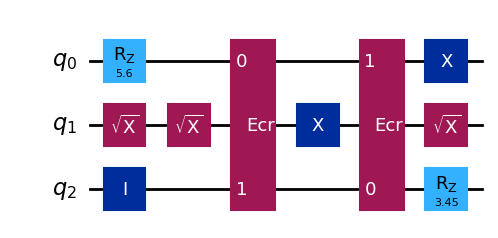

In [7]:
from qiskit.providers.basic_provider import BasicSimulator

# Main Function -- Calling Random Circuit Generator
    ## Circuit, noq, depth - all defined in above code blocks
runs = 2
backend = BasicSimulator()
# backend = service.backend("ibmq_qasm_simulator")

print("Circuit measurement outcomes:")
outputObj = Measurement_Op(noq, circuit, runs, backend)
circuitOutput = outputObj.get_circuit_output()
circuit.draw(output='mpl')

### Add noise to existing circuit and measure fidelity

In [9]:
import numpy as np
from qiskit.quantum_info.analysis import hellinger_fidelity

noiseCirc = circuit.copy()
noiseCirc.r(np.pi/2, 0, 0)

print("Noisy circuit measurment outcomes:")
outputObj = Measurement_Op(noq, noiseCirc, runs, backend)
noiseCircOutput = outputObj.get_circuit_output()

def get_fidelity(op1, op2, basis):
    res1 = op1.get(basis)
    res2 = op2.get(basis)
    print("Circuit - "+str(res1))
    print("Noisy C - "+str(res2))
    return hellinger_fidelity(res1, res2)

for i in range(0, runs):
    print('\nRUN ' + str(i) + ":")
    for b in ("X","Y","Z"):
        fidelity = get_fidelity(circuitOutput[i], noiseCircOutput[i], b)
        print("In basis "+b+", fidelity = " + str(fidelity))
    

Noisy circuit measurment outcomes:
{'X': {'010': 23, '001': 1009, '101': 25, '110': 960, '100': 984, '000': 29, '011': 951, '111': 19}, 'Y': {'010': 34, '111': 19, '000': 29, '011': 965, '001': 959, '101': 23, '110': 998, '100': 973}, 'Z': {'101': 981, '000': 1017, '010': 987, '111': 1015}}
{'X': {'000': 21, '111': 19, '011': 967, '010': 24, '001': 967, '101': 27, '110': 1007, '100': 968}, 'Y': {'010': 21, '001': 953, '101': 27, '100': 1020, '110': 1001, '111': 19, '000': 25, '011': 934}, 'Z': {'010': 973, '000': 1017, '101': 1034, '111': 976}}

RUN 0:
Circuit - {'111': 22, '000': 32, '011': 994, '001': 976, '101': 20, '010': 29, '110': 974, '100': 953}
Noisy C - {'010': 23, '001': 1009, '101': 25, '110': 960, '100': 984, '000': 29, '011': 951, '111': 19}
In basis X, fidelity = 0.9995355211571499
Circuit - {'010': 25, '100': 954, '110': 977, '001': 1011, '101': 24, '000': 20, '011': 960, '111': 29}
Noisy C - {'010': 34, '111': 19, '000': 29, '011': 965, '001': 959, '101': 23, '110': 99

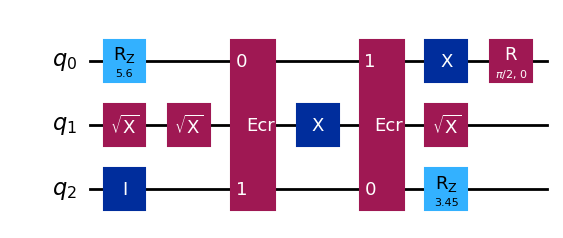

In [10]:
noiseCirc.draw("mpl")